In [14]:
# Imports
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [15]:
#Load Mnist dataset
mnist = tf.keras.datasets.mnist
(images, labels), (_,_ ) = mnist.load_data()

Shift image right

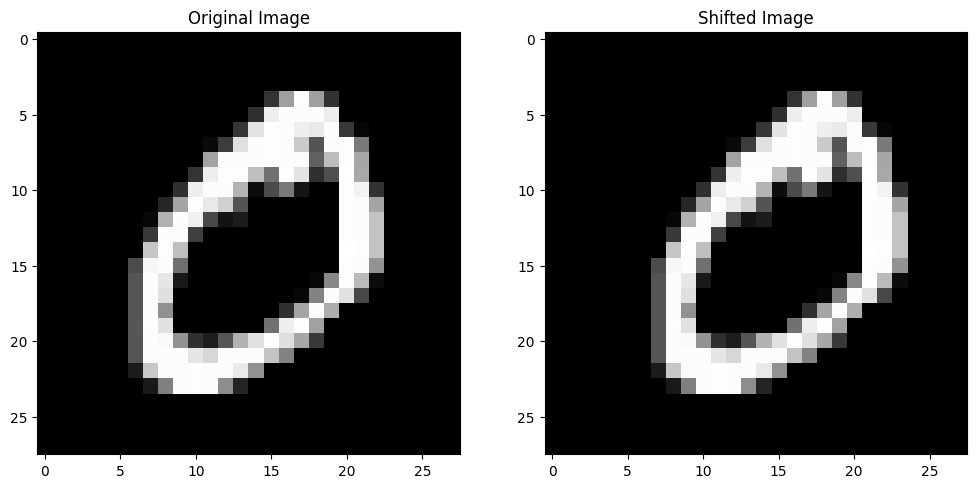

In [16]:
zero = images[labels == 0][0]
zero_shifted = np.zeros_like(zero)
for i in range(len(zero)):
    zero_shifted[i][0] = 0  # First column is set to 0
    for j in range(1, len(zero[0])):  # Shift the rest of the columns
        zero_shifted[i][j] = zero[i][j - 1]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(zero, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(zero_shifted, cmap='gray')
plt.title('Shifted Image')
plt.show()


In [17]:
eVal, eVec = np.linalg.eig(zero)
non_zero_indices = np.where(np.abs(eVal) > 0)[0]
eVal = eVal[non_zero_indices]
eVec = eVec[:, non_zero_indices]
eVec = eVec.T

eVal_shifted, eVec_shifted = np.linalg.eig(zero_shifted)
non_zero_indices = np.where(np.abs(eVal_shifted) > 0)[0]
eVal_shifted = eVal_shifted[non_zero_indices]
eVec_shifted = eVec_shifted[:, non_zero_indices]
eVec_shifted = eVec_shifted.T

In [18]:

#print(eVal_shifted)

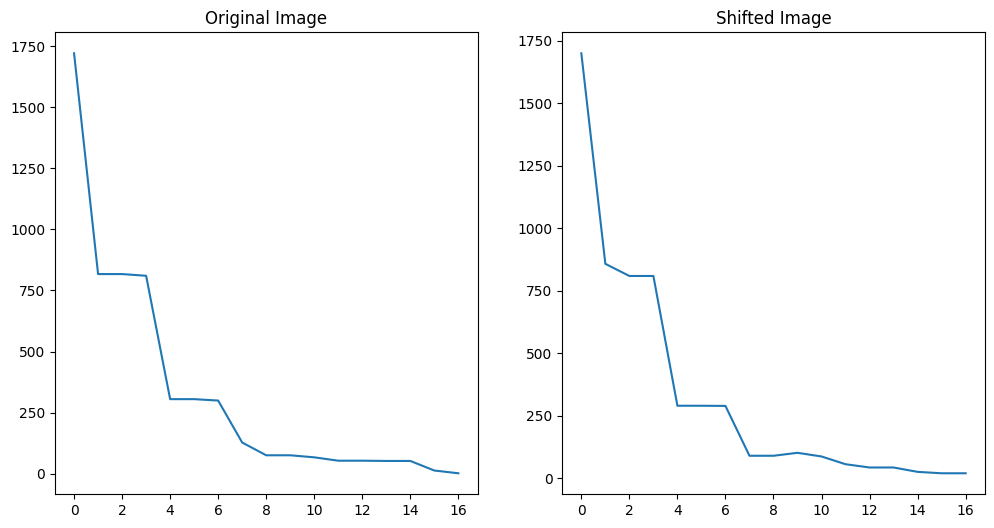

In [19]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(np.abs(eVal))
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.plot(np.abs(eVal_shifted))
plt.title('Shifted Image')
plt.show()

In [20]:
angle = np.zeros((17, 17))

# Calculate angles and populate the angle matrix
for i in range(17):
    for j in range(17):
        # Compute cosine similarity between row i of eVec and row j of eVec_shifted
        a = np.abs(eVec[i])
        b = np.abs(eVec_shifted[j])
        dot_product = np.dot(a, b)
        norm_a = np.linalg.norm(a)
        norm_b = np.linalg.norm(b)
        cosine_similarity = dot_product / (norm_a * norm_b)
        
        # Store the result in the angle matrix
        angle[i, j] = cosine_similarity

#print(angle)

Text(0.5, 1.0, 'Original Image')

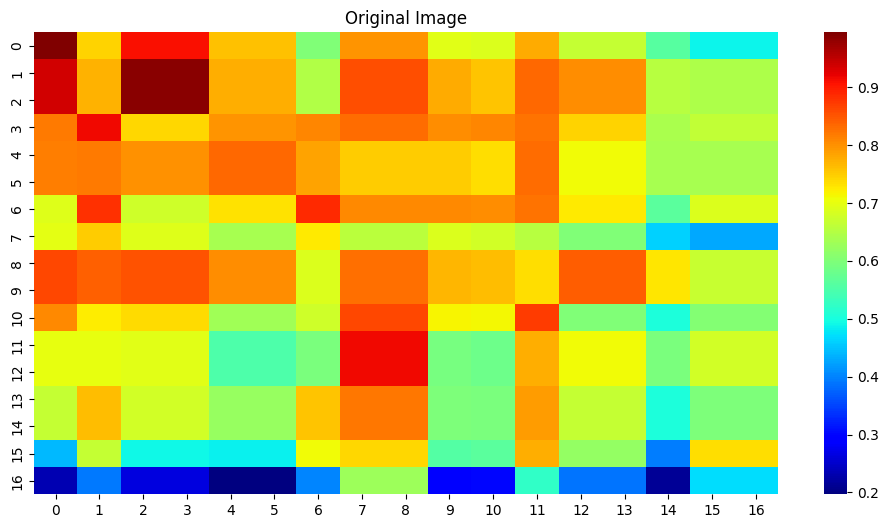

In [21]:

plt.figure(figsize=(12, 6))
sns.heatmap(angle, cmap='jet')
plt.title('Original Image')


Shift image left

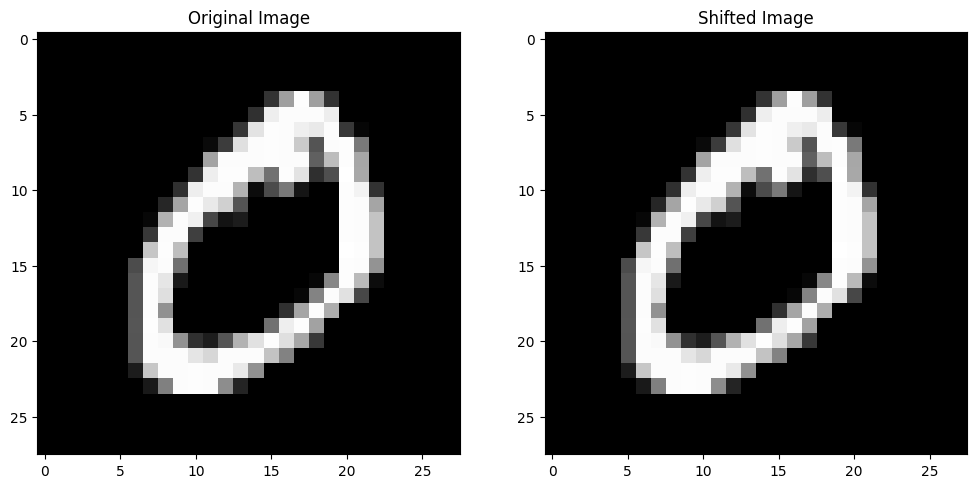

In [22]:
# Shift the image left by one pixel
for i in range(len(zero)):
    for j in range(len(zero[0]) - 1):
        zero_shifted[i][j] = zero[i][j + 1]
    zero_shifted[i][-1] = 0  # Set the last column to 0 

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(zero, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(zero_shifted, cmap='gray')
plt.title('Shifted Image')
plt.show()


In [23]:
eVal, eVec = np.linalg.eig(zero)
non_zero_indices = np.where(np.abs(eVal) > 0)[0]
eVal = eVal[non_zero_indices]
eVec = eVec[:, non_zero_indices]
eVec = eVec.T

eVal_shifted, eVec_shifted = np.linalg.eig(zero_shifted)
non_zero_indices = np.where(np.abs(eVal_shifted) > 0)[0]
eVal_shifted = eVal_shifted[non_zero_indices]
eVec_shifted = eVec_shifted[:, non_zero_indices]
eVec_shifted = eVec_shifted.T

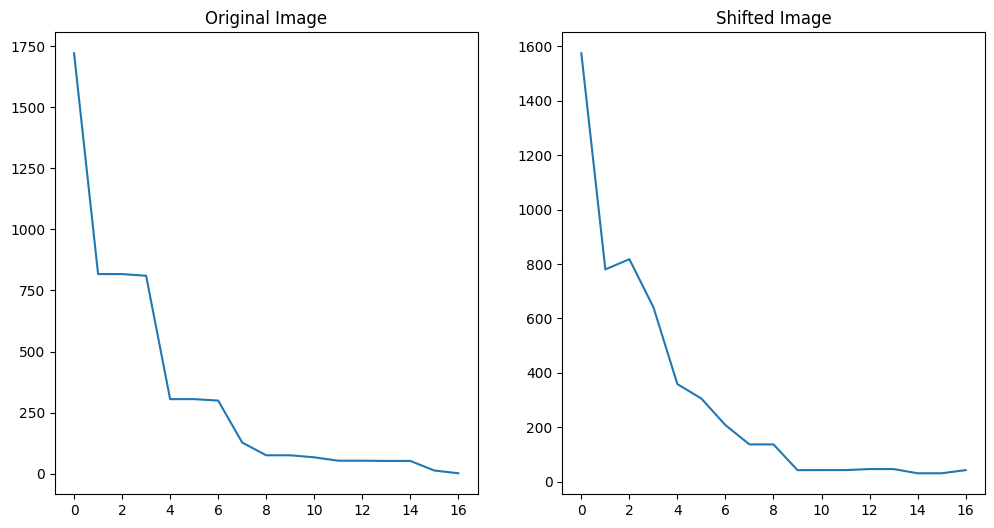

In [24]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(np.abs(eVal))
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.plot(np.abs(eVal_shifted))
plt.title('Shifted Image')
plt.show()

In [25]:
angle = np.zeros((17, 17))

# Calculate angles and populate the angle matrix
for i in range(17):
    for j in range(17):
        # Compute cosine similarity between row i of eVec and row j of eVec_shifted
        a = np.abs(eVec[i])
        b = np.abs(eVec_shifted[j])
        dot_product = np.dot(a, b)
        norm_a = np.linalg.norm(a)
        norm_b = np.linalg.norm(b)
        cosine_similarity = dot_product / (norm_a * norm_b)
        
        # Store the result in the angle matrix
        angle[i, j] = cosine_similarity

#print(angle)

Text(0.5, 1.0, 'Original Image')

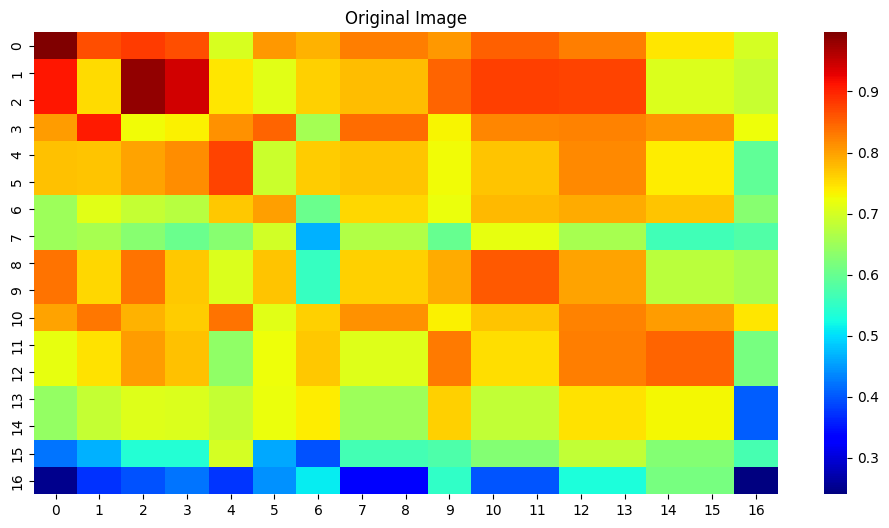

In [26]:

plt.figure(figsize=(12, 6))
sns.heatmap(angle, cmap='jet')
plt.title('Original Image')


Rotate by 90 degree

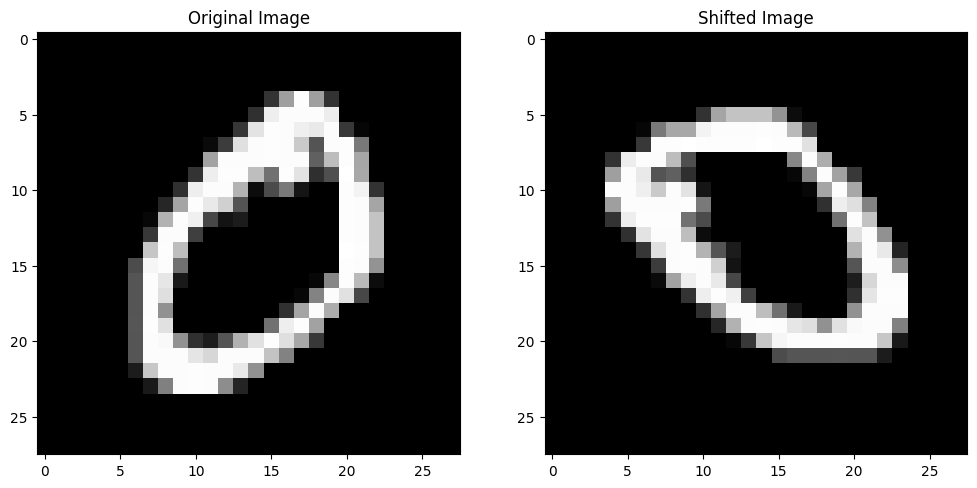

In [27]:
# Shift the image left by one pixel
zero_shifted = np.rot90(zero)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(zero, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(zero_shifted, cmap='gray')
plt.title('Shifted Image')
plt.show()


In [28]:
eVal, eVec = np.linalg.eig(zero)
non_zero_indices = np.where(np.abs(eVal) > 0)[0]
eVal = eVal[non_zero_indices]
eVec = eVec[:, non_zero_indices]
eVec = eVec.T

eVal_shifted, eVec_shifted = np.linalg.eig(zero_shifted)
non_zero_indices = np.where(np.abs(eVal_shifted) > 0)[0]
eVal_shifted = eVal_shifted[non_zero_indices]
eVec_shifted = eVec_shifted[:, non_zero_indices]
eVec_shifted = eVec_shifted.T

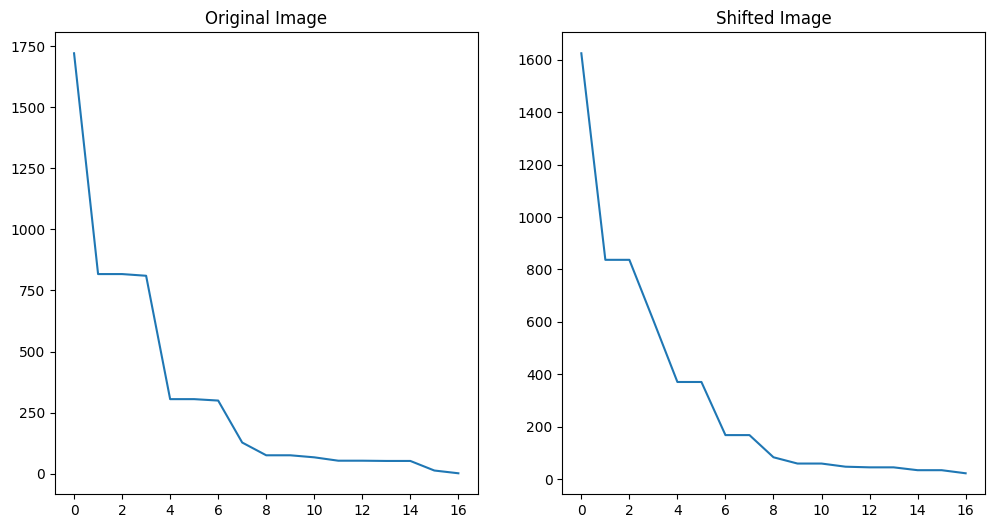

In [29]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(np.abs(eVal))
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.plot(np.abs(eVal_shifted))
plt.title('Shifted Image')
plt.show()

In [30]:
angle = np.zeros((17, 17))

# Calculate angles and populate the angle matrix
for i in range(17):
    for j in range(17):
        # Compute cosine similarity between row i of eVec and row j of eVec_shifted
        a = np.abs(eVec[i])
        b = np.abs(eVec_shifted[j])
        dot_product = np.dot(a, b)
        norm_a = np.linalg.norm(a)
        norm_b = np.linalg.norm(b)
        cosine_similarity = dot_product / (norm_a * norm_b)
        
        # Store the result in the angle matrix
        angle[i, j] = cosine_similarity

#print(angle)

Text(0.5, 1.0, 'Original Image')

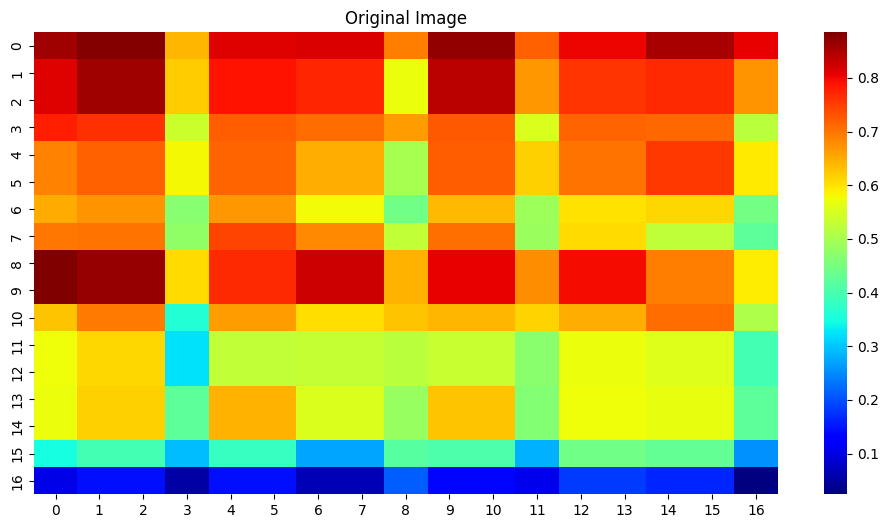

In [31]:

plt.figure(figsize=(12, 6))
sns.heatmap(angle, cmap='jet')
plt.title('Original Image')


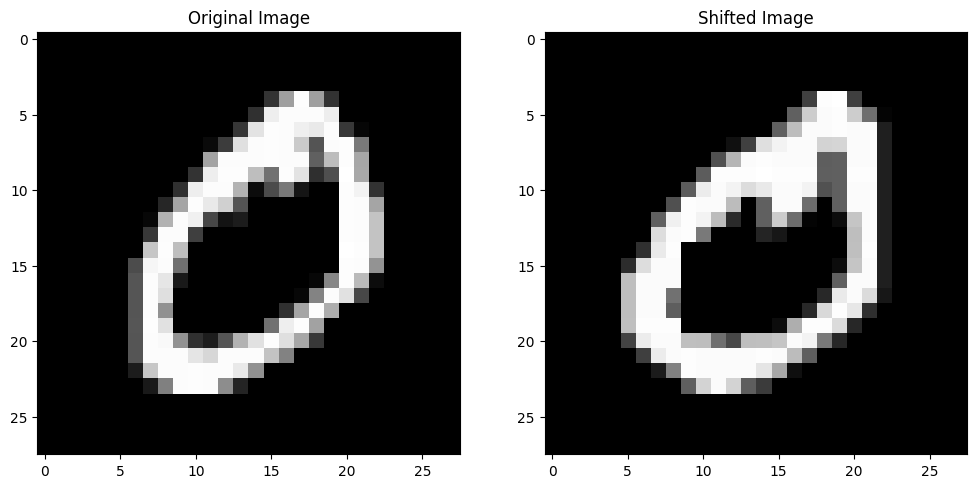

In [32]:
zero_shifted = images[labels == 0][1]
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(zero, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(zero_shifted, cmap='gray')
plt.title('Shifted Image')
plt.show()

In [33]:
eVal, eVec = np.linalg.eig(zero)
non_zero_indices = np.where(np.abs(eVal) > 0)[0]
eVal = eVal[non_zero_indices]
eVec = eVec[:, non_zero_indices]
eVec = eVec.T

eVal_shifted, eVec_shifted = np.linalg.eig(zero_shifted)
non_zero_indices = np.where(np.abs(eVal_shifted) > 0)[0]
eVal_shifted = eVal_shifted[non_zero_indices]
eVec_shifted = eVec_shifted[:, non_zero_indices]
eVec_shifted = eVec_shifted.T

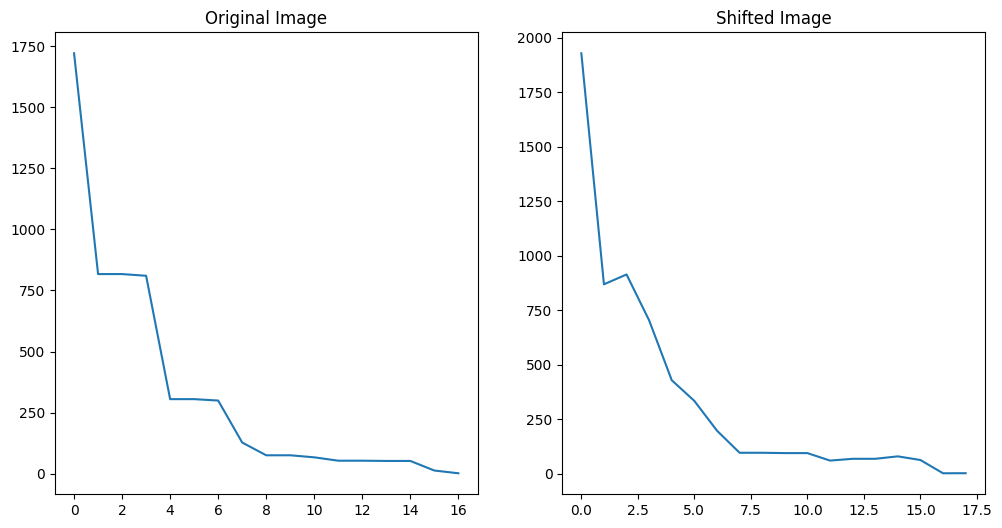

In [34]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(np.abs(eVal))
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.plot(np.abs(eVal_shifted))
plt.title('Shifted Image')
plt.show()

In [35]:
angle = np.zeros((17, 17))

# Calculate angles and populate the angle matrix
for i in range(17):
    for j in range(17):
        # Compute cosine similarity between row i of eVec and row j of eVec_shifted
        a = np.abs(eVec[i])
        b = np.abs(eVec_shifted[j])
        dot_product = np.dot(a, b)
        norm_a = np.linalg.norm(a)
        norm_b = np.linalg.norm(b)
        cosine_similarity = dot_product / (norm_a * norm_b)
        
        # Store the result in the angle matrix
        angle[i, j] = cosine_similarity

#print(angle)

Text(0.5, 1.0, 'Original Image')

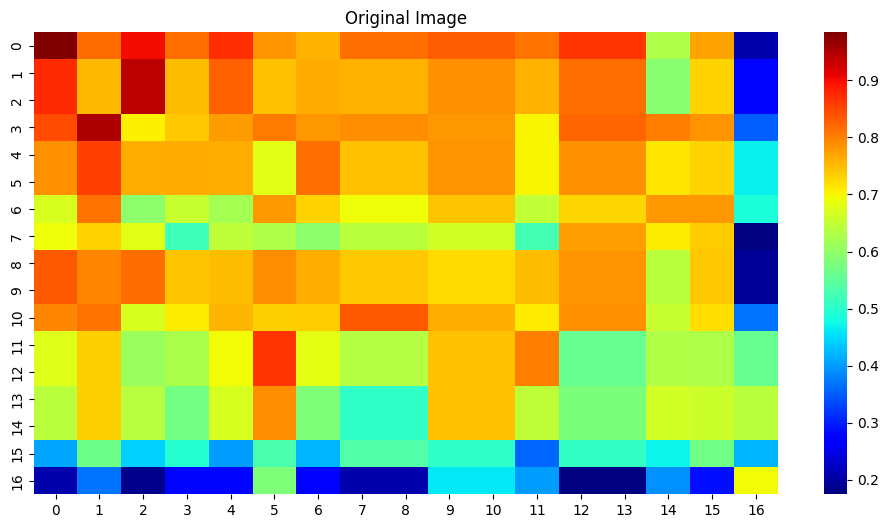

In [36]:

plt.figure(figsize=(12, 6))
sns.heatmap(angle, cmap='jet')
plt.title('Original Image')
